# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
$$
\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b
$$


- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)


- $w$ 를 구하는 함수

## 손실(loss)함수/오차(error)함수/비용(cost)함수/목적(objective)함수

- 모델이 출력한 예측값과 실제 값 사이의 차이를 계산하는 함수
- 평가 지표로 사용되기도 하고 모델을 최적화하는데 사용된다.

## 최적화(Optimize)

- 손실함수의 값이 최소화 되도록 모델을 학습하는 과정.
- 최적화의 두가지 방법
    - 정규방정식
    - 경사하강법

### Boston DataSet
 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%)
 
 - MEDV	: Target.  본인 소유의 주택가격(중앙값) (단위: $1,000)


In [164]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston
data =load_boston()  # 번치 타입 
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [165]:
X, y = data['data'], data['target']
df = pd.DataFrame(X, columns=data['feature_names'])
df['MEDV'] = y

In [166]:
df.shape

(506, 14)

In [167]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [168]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [169]:
df['CHAS'].value_counts() # 범주형

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## LinearRegression
- 가장 기본적인 선형 회귀 모델 
- Feature 전처리 
    - 범주형 : One hot encoding 
    - 연속형 : Feature Scaling 한다. (StandardScaler를 사용하는 경우 성능이 더 좋게 나온다)

In [171]:
chas_df =pd.get_dummies(df['CHAS'])
chas_df.columns =['CHAS_0','CHAS_1']
chas_df.head()

,CHAS_0,CHAS_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [172]:
df2= df.join(chas_df)  #CHAS 원핫인코딩 컬럼을 DF에 추가
df2.drop(columns='CHAS', inplace=True) # CHAS 컬럼 제거
df2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0


In [173]:
y=df2['MEDV']
X=df2.drop(columns ='MEDV')

In [174]:
# Train/test set 으로 분리 
#연속형 컬럼 scaling 

from sklearn.model_selection import train_test_split 

X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=0)
X_train.shape, X_test.shape


((379, 14), (127, 14))

In [175]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [176]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn. metrics import mean_squared_error, r2_score

#평가지표 출력 함수

def print_regression_metrics(y,pred, title=None):
    mse = mean_squared_error(y,pred)
    rmse =np.sqrt(mse)
    r2=r2_score(y,pred)
    if title:
        print(title)
    print(f'MSE:{mse}, RMSE:{rmse}, R2: {r2}')
    print('_' *100)

In [178]:
#from util import print_metrics, print_regression_metrics  # 함수 저장 후 불러오기 

In [179]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train) # 각 Feature에 곱할 weight(가중치), bias(편향)을 찾는다.


LinearRegression()

In [180]:
# bias 절편   
lr.intercept_   # 모든 항목이 0 일때 집값 

22.608707124010557

In [181]:
# w 가중치
lr.coef_

array([-0.97100092,  1.04667838, -0.04044753, -1.80876877,  2.60991991,
       -0.19823317, -3.00216551,  2.08021582, -1.93289037, -2.15743759,
        0.75199122, -3.59027047, -0.29704388,  0.29704388])

In [182]:
pd.Series(lr.coef_, index=X_train.columns)

CRIM      -0.971001
ZN         1.046678
INDUS     -0.040448
NOX       -1.808769
RM         2.609920
AGE       -0.198233
DIS       -3.002166
RAD        2.080216
TAX       -1.932890
PTRATIO   -2.157438
B          0.751991
LSTAT     -3.590270
CHAS_0    -0.297044
CHAS_1     0.297044
dtype: float64

In [183]:
# 모델 평가 
pred_train =lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_regression_metrics(y_train, pred_train, title ='Train')
print_regression_metrics(y_test, pred_test, title ='Test')

#RMSE 는 y 즉 집값의 오차   1.0 이 천달라  5.4 는 5천4백 달러 차이 

Train
MSE:19.640519427908046, RMSE:4.4317625644779355, R2: 0.7697699488741148
____________________________________________________________________________________________________
Test
MSE:29.782245092302414, RMSE:5.457311159564059, R2: 0.6354638433202122
____________________________________________________________________________________________________


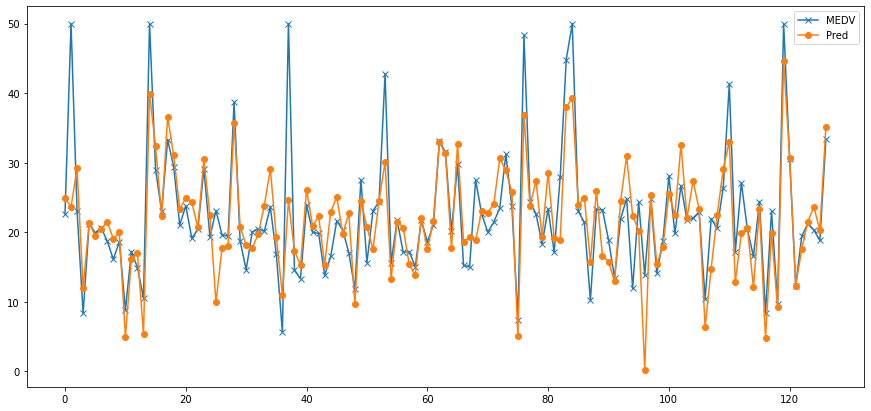

In [184]:
# 실제값(MEDV)과 예측값을 plotting
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,7))
plt.plot(range(len(y_test)),y_test, label='MEDV',marker ='x' )
plt.plot(range(len(y_test)),pred_test, label='Pred',marker ='o' )
plt.legend()
plt.show()

## 다항회귀 (Polynomial Regression)
- 단순한 직선형 보다는 복잡한 비선형 형태의 데이터를 추론하기 위한 모델
- Feature들을 거듭제곱한 Feature들을 추가하여 모델링한다. 
- polynomialFeatures 변화기를 이용


In [185]:
np.random.seed(0)
m= 100 #데이터 개수 
X =6*np.random.rand(m,1) -3
y=X**2 +X+2+np.random.normal(0.1,size=(m,1))
y=y.flatten()


In [186]:
X

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ],
       [ 0.87536468],
       [-0.37447673],
       [ 2.350638  ],
       [ 2.78197656],
       [-0.69935089],
       [ 1.75035023],
       [ 0.17336952],
       [ 0.40826737],
       [ 2.55357983],
       [-2.57378365],
       [-2.4772242 ],
       [-2.87868962],
       [ 1.99571907],
       [ 1.66894051],
       [ 2.22007289],
       [ 2.87171005],
       [ 1.79495139],
       [-0.23112383],
       [ 1.68317506],
       [-2.29035344],
       [ 0.83952613],
       [-2.13988028],
       [ 2.6680135 ],
       [ 0.13108993],
       [-0.51202836],
       [-1.41266633],
       [ 1.64540214],
       [-0.26309801],
       [ 0.41060369],
       [-2.8872612 ],
       [ 0.70581298],
       [ 0.67257434],
       [ 0.70160398],
       [ 2.66248847],
       [ 1.09092179],
       [-0.8429526 ],
       [-0.37780828],
       [ 1.18578718],
       [-2.63864717],
       [ 1.00060029],
       [ 1

In [187]:
df = pd.DataFrame({'X' :X.flatten(), 'y':y})
df.head()

,X,y
0,0.292881,1.313510
1,1.291136,5.958995
2,0.616580,3.562414
3,0.269299,0.905577
4,-0.458071,3.340010


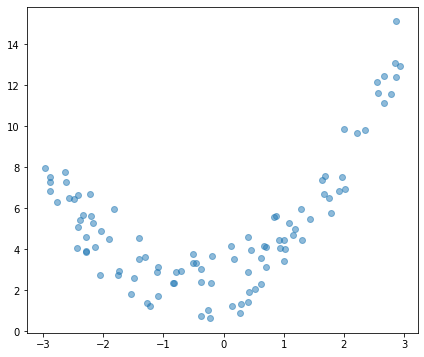

In [188]:
plt.figure(figsize =(7,6))
plt.scatter(X,y, alpha=0.5)
plt.show()


In [189]:
lr =LinearRegression()
lr.fit(X,y)
lr.coef_,lr.intercept_

#0.781 *X + 5.275 =pred

(array([0.78189543]), 5.275619278567208)

In [190]:
# 평가 
pred = lr.predict(X)
print_regression_metrics (y,pred)

# MSE:7.729204760808937, RMSE:2.7801447373848966, R2: 0.19138252437306003    R2 : 평균을 썼을 때 보다 20퍼 정도만 좋다.  안좋은 모델 

MSE:7.729204760808937, RMSE:2.7801447373848966, R2: 0.19138252437306003
____________________________________________________________________________________________________


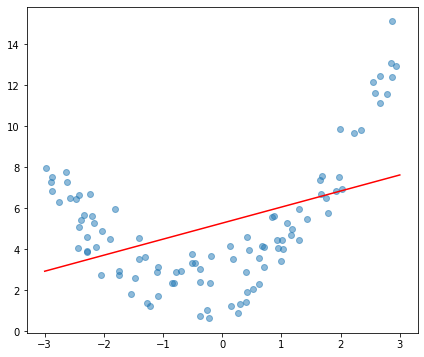

In [191]:
X_new =np.linspace(-3,3,100).reshape(-1,1)  # 2 차원으로 만든다. 
y_new =lr.predict(X_new)

plt.figure(figsize =(7,6))
plt.scatter(X,y, alpha=0.5)
plt.plot(X_new,y_new, color='red')
plt.show()


In [192]:
# X의 Feature를 늘려서 다항식이 되도록 처리 (2차 함수) => PolynomialFeature

In [194]:
from sklearn.preprocessing import PolynomialFeatures

pnf =PolynomialFeatures(degree=2, #degree  : 최고차항 지정  제곱한 항을 추가해 준다. degree =2
                       include_bias= False) # 상수항을 추가 (모든 값이 1인 Feature 추가)) 
X_poly =pnf.fit_transform(X)

In [195]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [196]:
X_poly, X[:2]

(array([[ 0.29288102,  0.08577929],
        [ 1.2911362 ,  1.66703268],
        [ 0.61658026,  0.38017121],
        [ 0.2692991 ,  0.072522  ],
        [-0.4580712 ,  0.20982923],
        [ 0.87536468,  0.76626332],
        [-0.37447673,  0.14023282],
        [ 2.350638  ,  5.52549903],
        [ 2.78197656,  7.7393936 ],
        [-0.69935089,  0.48909166],
        [ 1.75035023,  3.06372592],
        [ 0.17336952,  0.03005699],
        [ 0.40826737,  0.16668224],
        [ 2.55357983,  6.52076995],
        [-2.57378365,  6.62436228],
        [-2.4772242 ,  6.13663975],
        [-2.87868962,  8.2868539 ],
        [ 1.99571907,  3.98289462],
        [ 1.66894051,  2.78536241],
        [ 2.22007289,  4.92872363],
        [ 2.87171005,  8.24671863],
        [ 1.79495139,  3.22185048],
        [-0.23112383,  0.05341822],
        [ 1.68317506,  2.83307827],
        [-2.29035344,  5.2457189 ],
        [ 0.83952613,  0.70480412],
        [-2.13988028,  4.57908759],
        [ 2.6680135 ,  7.118

In [197]:
pnf.get_feature_names()

['x0', 'x0^2']

In [198]:
lr2 =LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

In [199]:
lr2.coef_, lr2.intercept_

(array([0.97906552, 0.94978823]), 2.440500756262886)

In [57]:
# 그래프 확인 

In [201]:
X_new_poly = pnf.transform(X_new)
X_new.shape, X_new_poly.shape

((100, 1), (100, 2))

In [202]:
y_new =lr2.predict(X_new_poly)
y_new

array([ 8.05139826,  7.76884669,  7.49327244,  7.22467552,  6.96305592,
        6.70841364,  6.46074869,  6.22006106,  5.98635076,  5.75961778,
        5.53986212,  5.32708379,  5.12128278,  4.9224591 ,  4.73061274,
        4.54574371,  4.36785199,  4.19693761,  4.03300054,  3.8760408 ,
        3.72605839,  3.58305329,  3.44702553,  3.31797508,  3.19590196,
        3.08080617,  2.9726877 ,  2.87154655,  2.77738272,  2.69019622,
        2.60998705,  2.5367552 ,  2.47050067,  2.41122347,  2.35892359,
        2.31360103,  2.2752558 ,  2.24388789,  2.21949731,  2.20208405,
        2.19164811,  2.1881895 ,  2.19170821,  2.20220425,  2.21967761,
        2.24412829,  2.2755563 ,  2.31396163,  2.35934429,  2.41170427,
        2.47104157,  2.5373562 ,  2.61064815,  2.69091743,  2.77816403,
        2.87238796,  2.9735892 ,  3.08176778,  3.19692367,  3.31905689,
        3.44816744,  3.58425531,  3.7273205 ,  3.87736301,  4.03438285,
        4.19838002,  4.36935451,  4.54730632,  4.73223546,  4.92

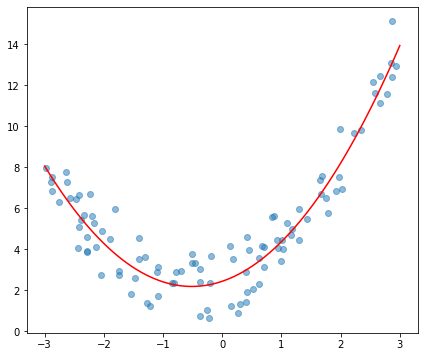

In [203]:
X_new =np.linspace(-3,3,100).reshape(-1,1)  # 2 차원으로 만든다. 
y_new =lr2.predict(X_new_poly)

plt.figure(figsize =(7,6))
plt.scatter(X,y, alpha=0.5)
plt.plot(X_new, y_new, color='red')
plt.show()

In [204]:
# 모델 평가
print_regression_metrics(y, lr2.predict(X_poly))

MSE:0.9735576723414217, RMSE:0.9866902616026073, R2: 0.8981478985551461
____________________________________________________________________________________________________


In [205]:
pred = lr.predict(X)  # X 제곱을 하지 않았을 때 모델 평가
print_regression_metrics (y,pred)

MSE:7.729204760808937, RMSE:2.7801447373848966, R2: 0.19138252437306003
____________________________________________________________________________________________________


## LinearRegression
- 가장 기본적인 선형 회귀 모델

In [59]:
# input data 가 다차원인 경우(Feature 수가 n개)
data = np.arange(12).reshape (4,3) #Feature :3

In [60]:
data

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [61]:
pnf2 =PolynomialFeatures(degree=2)
data_poly =pnf2.fit_transform(data)
data_poly.shape  # 3 개의 X 항 3 개의 X 제곱 ,절편 (1), 교차항 3개

(4, 10)

In [62]:
pnf2.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [63]:
pd.DataFrame(data_poly, columns=pnf2.get_feature_names())

,1,x0,x1,x2,x0^2,x0 x1,x0 x2,x1^2,x1 x2,x2^2
0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0
1,1.0,3.0,4.0,5.0,9.0,12.0,15.0,16.0,20.0,25.0
2,1.0,6.0,7.0,8.0,36.0,42.0,48.0,49.0,56.0,64.0
3,1.0,9.0,10.0,11.0,81.0,90.0,99.0,100.0,110.0,121.0


In [64]:
pnf3 = PolynomialFeatures(degree=3)
data_poly2=pnf3.fit_transform(data)
data_poly2.shape

(4, 20)

In [65]:
pnf3.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [72]:
# Degree를 크게 
pnf =PolynomialFeatures(degree= 100, include_bias =False)
X_train_poly_100 =pnf.fit_transform(X)
X_train_poly_100.shape,X.shape

((100, 100), (100, 1))

In [73]:
lr =LinearRegression()
lr.fit(X_train_poly_100,y)

LinearRegression()

In [74]:
lr.coef_.shape

(100,)

In [80]:
X_new =np.linspace(-3,3,100).reshape(-1,1)
X_new_poly_100 = pnf.fit_transform(X_new)
pred_new_100 =lr.predict(X_new_poly_100)

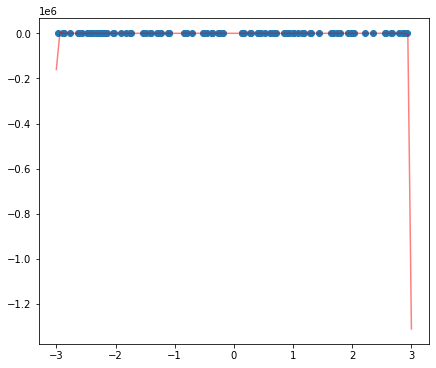

In [81]:
plt.figure(figsize=(7,6))
plt.scatter(X,y)
plt.plot(X_new,pred_new_100, color ='r', alpha=0.5)
plt.show()

## PolynomialFeatures를  Boston set 에 적용 

In [131]:
pnf = PolynomialFeatures(degree=2 , include_bias =False) #If True (default), then include a bias column,
X_train_scaled_poly = pnf.fit_transform(X_train_scaled)   # standard scaled 한 거 쓰기 X_train_scaled
X_test_scaled_poly =pnf.transform(X_test_scaled)


In [132]:
X_train_scaled.shape, X_train_scaled_poly.shape

((379, 13), (379, 104))

In [133]:
pnf.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x12',
 '

In [134]:
lr3= LinearRegression()
lr3.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [135]:
pred_train3 = lr3.predict(X_train_scaled_poly)
pred_test3=lr3.predict(X_test_scaled_poly)

In [112]:
lr3.coef_

array([ 2.22927455e+01,  2.17349195e+01,  1.22621162e+01, -1.71882645e+00,
        3.61365792e+00, -2.05795194e+00, -9.17471393e-02,  1.41224080e+01,
       -2.02991043e+01,  1.13454983e-01,  2.64784199e+00, -3.10928775e+00,
        1.39956378e+11, -1.10379063e+11,  1.04832574e-01,  6.57083812e+01,
        3.57670710e+01, -3.75691790e-01,  5.03884352e-01, -6.52625028e-01,
        1.01627960e+00,  4.46431028e+01, -6.78063332e+01,  4.81039398e+00,
       -4.54624494e-02,  7.91210762e-01,  1.85872355e+09,  1.85872356e+09,
       -7.57603562e-01, -1.18495904e+00, -4.59890818e+00,  3.04789843e-01,
        3.39078572e-01, -3.67067725e-02, -6.85110594e-01,  2.62293928e+00,
       -6.33844420e-01,  3.65823729e+00, -8.20008981e-01, -7.63027601e+09,
       -7.63027601e+09,  2.82873705e+00, -4.72434074e-02,  1.93804192e+00,
        1.06567234e+00,  2.63858527e+00, -3.11528091e+00,  1.61740025e+00,
       -8.31154786e-01,  3.49974846e+00, -6.28438310e-01,  1.01996560e+10,
        1.01996560e+10,  

In [136]:
print_regression_metrics(y_train, pred_train3, title='Train Poly')
print_regression_metrics(y_test, pred_test3, title='Test Poly')

Train Poly
MSE:4.09036261254377, RMSE:2.022464489810333, R2: 0.952051960903273
____________________________________________________________________________________________________
Test Poly
MSE:32.06913512158045, RMSE:5.662961691692824, R2: 0.607472195966608
____________________________________________________________________________________________________


In [ ]:
# 폴리 하지 않았을 때 
Train
MSE:19.640519427908046, RMSE:4.4317625644779355, R2: 0.7697699488741148
____________________________________________________________________________________________________
Test
MSE:29.782245092302414, RMSE:5.457311159564059, R2: 0.6354638433202122
____________________________________________________________________________________________________



# 폴리 했을 때 모델이 복잡해 기고 실제로 train 값이 좋아 졌다. 하지만 test 값은 폴리 하기 전보다 안 좋음  overfitting 발생 

# overfitting :  차수를 내려 준다 or LinearRegression 대신 다른 모델을 사용 (커버 모델)   =>  차수 내리는 게 쉽지 않다. 그래서 다른 모델을 대처로 사용하기도 한다.
# underfitting : 차수를 올려 준다. 

#어떤 컬럼이 중요 한지 아닌지 알 수 없다. 연관성이 있나 없나 이거를 알 수 없다. DecisionTree를 통해서 feature importance 도 할 수 있으나 

#피쳐를 줄이는 방법  어떤게 관계성 중요성이 많이 있는지 모르기 때문에 도메인 지식이 있어야 그런걸 잘 할 수 있다. 때문에 양치기로 놔두고 나중에 모델에 규제를 가 할 수 있다. 


잡음이 많아지면? overfitting 이 된다.  

## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용하는 것.
- 입력데이터의 Feature들이 너무 많은 경우 과적합이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 과적합이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 W(가중치)가 커지지 않도록 제한한다. 오차를 기반으로 한다. 
    
***Overfitting : features의 영향력을 줄인다.  => 오차를 크게 만든다.(${w^{2}}$ x $\alpha$ 를 MSE에 더한다.) => 머신이 오차를 줄이기 위해 ${w}$ => ${w'}$를  조정  => 오차가 큰 상태에서 새로운 ${w'}$ 의 탄생 후 적용 => ${w'}$은 만들어진 오차를 무력화 시키기 위해 ${w'}$ 는 '0'에 가깝게 된다.(큰 오차를 줄이기 위해서: 오차를 줄이는 방법은 ${w'}$ 에 곱해지는 $\alpha$ 값의 변화 ) => ${w'}$다시 피쳐 값에 영향을 준다.(0에 수렴할 수 있도록) => 피쳐의 값이 작게 변화한다.***  <br> 


- ***$\alpha$ 의 값으로 ${w'}$ 를 변화***


    

## Ridge Regression 
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 output에 대한 영향력이 작아지게 된다.
    - $\alpha$ 1 이 될수록 규제가 커지고 0이 될수록 규제가 작아진다. 

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

$$
\alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}} : W의 합계 커지면 오차가 커진다. => 머신이 W 값을 작게 만든다. => 0에 가깝게 만들어 준다. => 피쳐에 영향을 줘서 몇몇 피쳐를 무력화 시킨다.
$$

In [99]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
X, y= load_boston(return_X_y=True)
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=0)

scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [103]:
from sklearn.linear_model import Ridge
ridgel = Ridge()
ridgel.fit(X_train_scaled, y_train)
pred_train1 =ridgel.predict(X_train_scaled)
pred_test1 =ridgel.predict(X_test_scaled)

In [104]:
print('alpha=1')
print_regression_metrics(y_train,pred_train1, title="train")
print_regression_metrics(y_test,pred_test1, title='test')

alpha=1
train
MSE:19.64194935381896, RMSE:4.431923888540839, R2: 0.76975318699993
____________________________________________________________________________________________________
test
MSE:29.853763334547637, RMSE:5.463859746968954, R2: 0.634588456488905
____________________________________________________________________________________________________


In [106]:
ridgel.coef_

array([-0.96187481,  1.02775462, -0.06861144,  0.59814087, -1.77318401,
        2.6205672 , -0.20466821, -2.96504904,  2.00091047, -1.85840697,
       -2.14955893,  0.75175979, -3.57350065])

In [107]:
from sklearn.linear_model import Ridge
ridgel = Ridge(alpha=0.01, random_state=0)
ridgel.fit(X_train_scaled, y_train)
pred_train1 =ridgel.predict(X_train_scaled)
pred_test1 =ridgel.predict(X_test_scaled)

In [108]:
print('alpha=0.01')
print_regression_metrics(y_train,pred_train1, title="train")
print_regression_metrics(y_test,pred_test1, title='test')

alpha=0.01
train
MSE:19.640519579533198, RMSE:4.431762581584577, R2: 0.7697699470967349
____________________________________________________________________________________________________
test
MSE:29.782964300126448, RMSE:5.457377053138847, R2: 0.6354550401807844
____________________________________________________________________________________________________


In [109]:
ridgel.coef_

array([-0.97090686,  1.04648351, -0.04074187,  0.59413006, -1.80840456,
        2.61003017, -0.19830017, -3.00178921,  2.07939188, -1.93211252,
       -2.15735709,  0.75198861, -3.59010071])

In [110]:
from sklearn.linear_model import Ridge
ridgel = Ridge(alpha=100, random_state=0)
ridgel.fit(X_train_scaled, y_train)
pred_train1 =ridgel.predict(X_train_scaled)
pred_test1 =ridgel.predict(X_test_scaled)

print('alpha=100')
print_regression_metrics(y_train,pred_train1, title="train")
print_regression_metrics(y_test,pred_test1, title='test')

alpha=100
train
MSE:21.623288676085405, RMSE:4.650084803106864, R2: 0.7465275358078873
____________________________________________________________________________________________________
test
MSE:34.00022384210581, RMSE:5.83097108911593, R2: 0.5838355742745129
____________________________________________________________________________________________________


In [111]:
ridgel.coef_

array([-0.70264674,  0.54240165, -0.53923569,  0.64306674, -0.68579816,
        2.65013909, -0.30831263, -1.37939662,  0.30182806, -0.6303638 ,
       -1.78340946,  0.71421875, -2.68358134])

In [116]:
### GridSearchCV 이용해 최적의 alpha 
from sklearn.model_selection import GridSearchCV
param={"alpha" : [0.01,0.1,1,5,10,20,30,40,100]}
ridge =Ridge(random_state=0)
gs =GridSearchCV(ridge, param, cv=4, scoring=['r2','neg_mean_squared_error'], refit='r2')

gs.fit(X_train_scaled,y_train)

GridSearchCV(cv=4, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 30, 40, 100]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [119]:
result_df =pd.DataFrame(gs.cv_results_)
result_df.sort_values('rank_test_r2').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
5,0.000499,0.000499,0.000253,0.000438,20,{'alpha': 20},0.769783,0.645949,0.646802,0.818040,0.720144,0.075716,1,-17.823357,-26.999550,-30.525873,-18.104060,-23.363210,5.542457,2
4,0.000747,0.000431,0.000000,0.000000,10,{'alpha': 10},0.762913,0.645798,0.650567,0.820667,0.719986,0.074670,2,-18.355176,-27.011065,-30.200460,-17.842694,-23.352349,5.376125,1
6,0.001004,0.000006,0.000247,0.000428,30,{'alpha': 30},0.773569,0.646587,0.644039,0.814082,0.719569,0.075631,3,-17.530173,-26.950941,-30.764711,-18.497835,-23.435915,5.597524,4
3,0.000000,0.000000,0.000502,0.000502,5,{'alpha': 5},0.757436,0.646131,0.653369,0.820574,0.719378,0.073163,4,-18.779233,-26.985694,-29.958289,-17.851926,-23.393786,5.196172,3
7,0.000250,0.000433,0.000750,0.000433,40,{'alpha': 40},0.775585,0.647291,0.641584,0.809645,0.718526,0.075088,5,-17.374137,-26.897195,-30.976839,-18.939336,-23.546877,5.607163,8


## 규제 alpha 에 따른 weight 변화

## Lasso(Least Absolut Shrinkage and Selection Operator) Regression

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [120]:
from sklearn.linear_model import Lasso

In [124]:
lasso = Lasso() #alpha = 1 default 
lasso.fit(X_train_scaled ,y_train)
pred_train =lasso.predict(X_train_scaled)
pred_test =lasso.predict(X_test_scaled)

print('alpha=1')
print_regression_metrics(y_train,pred_train, 'alpha=1 Train')
print_regression_metrics(y_test,pred_test, 'alpha=1 Test')

alpha=1
alpha=1 Train
MSE:25.38793844433231, RMSE:5.038644504659196, R2: 0.702397567056503
____________________________________________________________________________________________________
alpha=1 Test
MSE:35.48963616828034, RMSE:5.957317866983458, R2: 0.5656050935497574
____________________________________________________________________________________________________


In [125]:
lasso.coef_   # 나머지 0 이된 피쳐 제외된다. 

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.52933025, -0.        , -0.        , -0.        , -0.22763148,
       -1.70088382,  0.13186059, -3.60565498])

In [126]:
df2

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,1,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,1,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,1,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,1,0


In [127]:
lasso = Lasso(alpha=10, random_state=0)
lasso.fit(X_train_scaled ,y_train)
pred_train =lasso.predict(X_train_scaled)
pred_test =lasso.predict(X_test_scaled)

print('alpha=1')
print_regression_metrics(y_train,pred_train, 'alpha=1 Train')
print_regression_metrics(y_test,pred_test, 'alpha=1 Test')

alpha=1
alpha=1 Train
MSE:85.30823553163789, RMSE:9.236245748768159, R2: 0.0
____________________________________________________________________________________________________
alpha=1 Test
MSE:81.7904659829155, RMSE:9.043808157126925, R2: -0.001119359203955339
____________________________________________________________________________________________________


In [129]:
lasso.intercept_

22.608707124010557

In [130]:
lasso.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

### Ridge, Lasso =>BostonDataset (polynomialFeatures로 전처리한)

In [137]:
alpha_list =[0.01,0.1,1,10,100]

In [139]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [142]:
lr =LinearRegression()
lr.fit(X_train_scaled_poly,y_train)

pred_train_lr =lr.predict(X_train_scaled_poly)
pred_test_lr=lr.predict(X_test_scaled_poly)

print_regression_metrics(y_train,pred_train_lr ,title ='LinearRegression Train')
print_regression_metrics(y_test,pred_test_lr ,title ='LinearRegression Test')

LinearRegression Train
MSE:4.09036261254377, RMSE:2.022464489810333, R2: 0.952051960903273
____________________________________________________________________________________________________
LinearRegression Test
MSE:32.06913512158045, RMSE:5.662961691692824, R2: 0.607472195966608
____________________________________________________________________________________________________


In [144]:
# Ridge 의 alpha 값 변화에 따른 R2 값을 저장할 리스트 
ridge_train_metrics_list =[]
ridge_test_metrics_list =[]

for alpha in alpha_list:
    ridge =Ridge(alpha =alpha, random_state=0)
    ridge.fit(X_train_scaled_poly, y_train)
    pred_train =ridge.predict(X_train_scaled_poly)
    pred_test =ridge.predict(X_test_scaled_poly)
    ridge_train_metrics_list.append(r2_score(y_train, pred_train))
    ridge_test_metrics_list.append(r2_score(y_test, pred_test))    

In [145]:
ridge_result = pd.DataFrame({
    'alpha':alpha_list,
    'train': ridge_train_metrics_list,
    'test':ridge_test_metrics_list
})

In [146]:
ridge_result

,alpha,train,test
0,0.01,0.951620,0.617099
1,0.10,0.951046,0.628387
2,1.00,0.948182,0.669643
3,10.00,0.938182,0.768305
4,100.00,0.901260,0.761119


In [147]:
X_train_scaled_poly.shape

(379, 104)

In [151]:
ridge.coef_

array([-0.19101856,  0.0899258 , -0.42233563,  0.06601883, -0.55205111,
        2.49131161, -0.66740008, -0.34192005,  0.0790346 , -0.62525151,
       -0.91924902,  0.44256536, -2.21847012,  0.06167904,  0.05698671,
        0.06458531,  0.27504048, -0.24639908,  0.17797836,  0.02561185,
        0.28922796, -0.34922955, -0.01152464,  0.09976003,  0.00434348,
       -0.11422544,  0.30970811,  0.01717699,  0.10197168,  0.10691894,
        0.17317228, -0.00579971, -0.05077549,  0.06552276,  0.0079976 ,
        0.23805403, -0.0472121 ,  0.20734616,  0.38424164,  0.13360782,
        0.23448052, -0.09393006,  0.39581662,  0.21520088,  0.2338481 ,
        0.05859386, -0.13238895,  0.00825547, -0.45731646,  0.23088308,
       -0.58379269, -0.34942198,  0.33371955, -0.14096342,  0.28108111,
        0.38276643,  0.18755791,  0.12650798, -0.38442676, -0.26279788,
       -0.48170641,  0.01361722,  0.40688959, -0.39009147, -0.0744757 ,
       -0.04192381,  0.05021902,  0.1521431 ,  0.44765692, -0.32

In [159]:
lasso_train_metrics_list =[]
lasso_test_metrics_list =[]

for alpha in alpha_list:
    lasso =Lasso(alpha =alpha, random_state=0)
    lasso.fit(X_train_scaled_poly, y_train)
    pred_train =lasso.predict(X_train_scaled_poly)
    pred_test =lasso.predict(X_test_scaled_poly)
    lasso_train_metrics_list.append(r2_score(y_train, pred_train))
    lasso_test_metrics_list.append(r2_score(y_test, pred_test)) 

In [160]:
lasso_result = pd.DataFrame({
    'alpha':alpha_list,
    'train':lasso_train_metrics_list,
    'test':lasso_test_metrics_list
})

In [161]:
lasso_result

,alpha,train,test
0,0.01,0.944940,0.687005
1,0.10,0.910694,0.776997
2,1.00,0.802262,0.695405
3,10.00,0.008723,0.009718
4,100.00,0.000000,-0.001119


## 엘라스틱넷
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 회귀 규제항을 더해서 추가한다. 
- 혼합뷰율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [207]:
from sklearn.linear_model import ElasticNet

In [210]:
elastic =ElasticNet(alpha=1 ,l1_ratio=0.4) #l1 규제(Lasso) 비율:0.4, L2규제(Ridge) 비율 : 0.6
elastic.fit(X_train_scaled_poly,y_train)

pred_train =elastic.predict(X_train_scaled_poly)
pred_test =elastic.predict(X_test_scaled_poly)

In [211]:
print_regression_metrics(y_train, pred_train , title ='Train')
print_regression_metrics(y_test, pred_test , title ='Test')

Train
MSE:16.415889278175886, RMSE:4.051652660109932, R2: 0.8075697009102035
____________________________________________________________________________________________________
Test
MSE:26.742061561095706, RMSE:5.171272721593371, R2: 0.6726758404894158
____________________________________________________________________________________________________


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 릿지를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 라쏘 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 엘라스틱넷을 사용한다.